## Neural Network Classification with PyTorch
Classification tasks are basically differentiating between something, or predicting whether something is one thing or another. There are three major types of classification in the realm of Machine Learning:
* **Binary Classification** - Differentiating between two things (e.s. Cat or Dog, Yes or No, 1 or 0, True or False, etc.)</br></br>
* **Multiclass Classification** - Differentiating between more than two things (e.s. Cat or Dog or Cow or Fox, etc.)</br></br>
* **Multi-label Classification** - Differentiating between two or more things with multiple labels for each (e.s. Article category, Related news, Recommendation, etc)</br>
<img src="../resources/Classification_types.jpg"></img>
</br></br>
#### Get Started with some custom data
We will make our own custom dataset to properly learn how the classification tasks are being done.

In [1]:
# Import scikit-learn module and import make_circles data
import sklearn
from sklearn.datasets import make_circles

# Make a thousand smaples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                   noise=0.04,
                   random_state=42)

In [2]:
print(f"Length of Data\t: {len(X)}\nLength of Label\t: {len(y)}")

Length of Data	: 1000
Length of Label	: 1000


In [3]:
print(f"First 5 samples of X:\n{X[:5]}\n")
print(f"First 5 samples of y:\n{y[:5]}\n")

First 5 samples of X:
[[ 0.74822656  0.23908325]
 [-0.74509559  0.16097526]
 [-0.82262532  0.19762051]
 [-0.41143316  0.68255648]
 [ 0.44390494 -0.89582949]]

First 5 samples of y:
[1 1 1 1 0]



#### View the data as a DataFrame

In [4]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.748227,0.239083,1
1,-0.745096,0.160975,1
2,-0.822625,0.197621,1
3,-0.411433,0.682556,1
4,0.443905,-0.895829,0
5,-0.474766,0.692236,1
6,-0.014847,0.804486,1
7,0.765568,0.153643,1
8,-0.172507,-0.796646,1
9,-0.116051,1.031858,0


In [5]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

#### Visualize the data

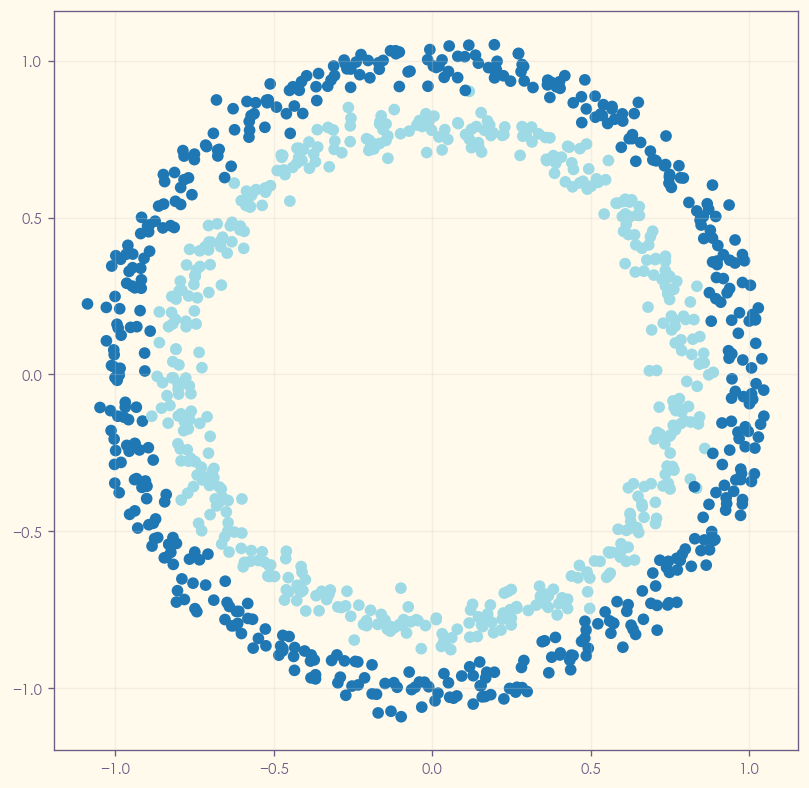

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y,
            cmap=plt.cm.tab20)
plt.show()

*Note: This dataset is often known or referred as the 'toy dataset'. This dataset is small for experiments but sizeable enough to practice, or play with the fundamentals of Machine Learning.

#### Check shapes

In [7]:
print(f"Shape of Data\t: {X.shape}\nShape of Label\t: {y.shape}")

Shape of Data	: (1000, 2)
Shape of Label	: (1000,)


In [8]:
# View the first example of featuires and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.74822656 0.23908325] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


#### Turn the data into Tensors

In [9]:
import torch

# Check the version
print(f"PyTorch Version: {torch.__version__}")

PyTorch Version: 2.5.1


In [10]:
# Turn the data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [11]:
# Let's check the values now
print(f"First 5 values of X:\n{X[:5], X.dtype}\n\nFirst 5 values of y:\n{y[:5], y.dtype}")

First 5 values of X:
(tensor([[ 0.7482,  0.2391],
        [-0.7451,  0.1610],
        [-0.8226,  0.1976],
        [-0.4114,  0.6826],
        [ 0.4439, -0.8958]]), torch.float32)

First 5 values of y:
(tensor([1., 1., 1., 1., 0.]), torch.float32)


In [12]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #20% test 80% train
                                                    random_state=42)

print(f"Length of Train splits\t: {len(X_train), len(y_train)}")
print(f"Length of Test splits\t: {len(X_test), len(y_test)}")

Length of Train splits	: (800, 800)
Length of Test splits	: (200, 200)


## Building a Model
Let's build a model to classify our different color dots.</br>
We need to do:
* Setup device agnostic code
* Construct a model (by using `nn.Module()`)
* Define a `Loss Function` and `Optimizer`
* Create a training and testing loop

In [13]:
# Import nn
from torch import nn

# Make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Active Device: {device}")

Active Device: cuda


#### Constructing a Model
To create a model, we need to:
* Use subclass `nn.Module()`
* Create **two** `nn.Linear()` layers for handling our shape of data
* Define a `forward()` method that outlines the foreward computation
* Instantiating an instance of our model and set it to current active device

In [14]:
# Construct a model using nn.Module() subclass

class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Create 2 nn.Linear layers
        # Keeping random out _feature here for learning purpose
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
        # This layer's in_features should match with the previous layer's out_feature
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in previous layer's upscaled 5 features and give us single feature
        
    # Define a forward method that outlines forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x --> layer_1 --> layer_2 --> output
    
# Instantiate an instance of the model and pass it to device
model_0 = CircleModel().to(device)
model_0

# Transfer the data to device too
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [15]:
next(model_0.parameters()).device

device(type='cuda', index=0)

#### Visualize what's happening
<img src="../resources/NN_diagram.jpg" width=70%></img>

### Using "nn.Sequential()" to replicate the model 

In [16]:
"""This is the same model as the one above with the constructor and forward pass
code we wrote. Sequential() is doing the same thing in the background."""

model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

To view the model structure or summary, we can use `torchinfo` and import `summary` 

In [17]:
from torchinfo import summary

print(f"A simple linear structure with basic information:\n{model_1}\n")
print(f"More clear model structure with broad summary with parameters:\n{summary(model_1)}")

A simple linear structure with basic information:
Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

More clear model structure with broad summary with parameters:
Layer (type:depth-idx)                   Param #
Sequential                               --
├─Linear: 1-1                            15
├─Linear: 1-2                            6
Total params: 21
Trainable params: 21
Non-trainable params: 0


In [18]:
# Make some prediction

model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5806, -0.1778],
                      [ 0.3755,  0.4282],
                      [-0.2627,  0.2152],
                      [-0.6556, -0.2926],
                      [ 0.6258,  0.3078]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.5199,  0.4900, -0.1126,  0.1644, -0.0176], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.2621,  0.0120, -0.0299,  0.3819, -0.3079]], device='cuda:0')),
             ('1.bias', tensor([0.1818], device='cuda:0'))])

In [19]:
with torch.inference_mode():
    untrained_preds = model_1(X_test.to(device))
    
print(f"Length of Predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 Predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of Predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 Predictions:
tensor([[0.3257],
        [0.1442],
        [0.6675],
        [0.2227],
        [0.4809],
        [0.3684],
        [0.0156],
        [0.0655],
        [0.6837],
        [0.1356]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


### Setup Loss function and Optimizer

##### Which loss and optimizer should we use?
In standard case situation, we use these Loss functions:
* For **Regression** models = MAE (Mean Absolute Error / L1) or MSE (Mean Squared Error / L2)
* For **Classification** models = Binary Cross Entropy (BCE) or Categorical Cross Entropy (CrossEntropy)

And for Optimizers, the most common and useful are:
* Adam
* SGD (Stochastic Gradient Descentt)
* RMSProp (Root Mean Squared Propagation)

<br>

##### What loss and optimizer we will be using?
This stage of our code, we are going to use the Binary Cross Entropy (BCE) with Logits Loss function -> `torch.nn.BCEWithLogitsLoss()` <br>
Technically, `BCEWithLogitsLoss = BCELoss + Sigmoid Activation function`. This loss function gives us more numeric stability than a simple `BCELoss`.
And for optimizer, we will stick with SGD. <br><br>

##### What is Logits Loss in BCE?
Well, that's a good question and a complicated one indeed. There are rarely any resources that address it Logits in a well and understandable way in the context of BCE with Logits Loss. I have attached a PDF in this folder explaining about logits and its use in BCE loss. If you want to deep-dive, you could use that resource -->
<a href="..\resources\Logits_and_BCE_with_Logits_Loss.pdf">PDF for Logits Loss</a>

In [20]:
# Setup Loss and Optimizer

# loss_fn = nn.BCELoss() # BCELoss() = requires inputs through sigmoid activation first
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss() = sigmoid activation buil-in

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.1)

In [21]:
# Evaluation Metric
"""Calculate the Accuracy as well as Loss"""
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

### Training Model
Let's reiterate through the training loops:
* Forward Pass
* Calculate the Loss
* Optimizer zero grad
* Loss backward (backpropagation)
* Optimizer steps (gradient descent)

<br>

*** **N.B: Our model outputs are going to be logits (raw outputs without probability). We can convert these into probs later by passing them into an activation function (e.g., sigmoid for BC and softmax for multiclass classification.**

The steps we are going to follow for our model classification:
* Take the raw logits from the output layer
* Predict the probabilities (using activation)
* Predicting the class labels

In [22]:
# View the first 5 outputs of the forward pass on the test data
model_1.eval()
with torch.inference_mode():
    y_logits = model_1(X_test.to(device))[:5]
y_logits

tensor([[0.3257],
        [0.1442],
        [0.6675],
        [0.2227],
        [0.4809]], device='cuda:0')

In [23]:
y_test[:5]

tensor([1., 0., 1., 0., 1.], device='cuda:0')

In [24]:
# Use the sigmoid activation on our model logits to turn them into probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5807],
        [0.5360],
        [0.6609],
        [0.5554],
        [0.6180]], device='cuda:0')

In [25]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs`  < 0.5, `y=0` (class 0)

In [26]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_1(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

#### Building a training and testing loops

In [27]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 200

# Put data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training Loop
    model_1.train()
    
    """1. Forward pass"""
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # Converts the logits into probs
    
    """2. Calculate the loss/accuracy"""
#     loss = loss_fn(torch.sigmoid(y_logits),    # BCELoss expects pred probs as input
#                    y_train)
    loss = loss_fn(y_logits,   # BCEWithLogitsLoss excepts logits as input
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    """3. Opptimizer Zero grad"""
    optimizer.zero_grad()
    
    """4. Loss Backward (backprop)"""
    loss.backward()
    
    """5. Optimizer step"""
    optimizer.step()
    
    
    ### Testing loop
    model_1.eval()
    with torch.inference_mode():
        # forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
    # calculate loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
    # Print out the loops
    
    if epoch % 10 == 0:
        print(f"| Epoch: {epoch:03d} | Loss: {loss:.6f} | Acc: {acc:.6f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f} |")

| Epoch: 000 | Loss: 0.721900 | Acc: 50.500000 | Test Loss: 0.7085 | Test Acc: 50.5000 |
| Epoch: 010 | Loss: 0.709370 | Acc: 57.125000 | Test Loss: 0.6987 | Test Acc: 55.5000 |
| Epoch: 020 | Loss: 0.703444 | Acc: 53.125000 | Test Loss: 0.6945 | Test Acc: 54.0000 |
| Epoch: 030 | Loss: 0.700259 | Acc: 52.500000 | Test Loss: 0.6926 | Test Acc: 52.0000 |
| Epoch: 040 | Loss: 0.698346 | Acc: 52.125000 | Test Loss: 0.6917 | Test Acc: 52.5000 |
| Epoch: 050 | Loss: 0.697089 | Acc: 51.000000 | Test Loss: 0.6912 | Test Acc: 52.5000 |
| Epoch: 060 | Loss: 0.696210 | Acc: 50.750000 | Test Loss: 0.6911 | Test Acc: 53.5000 |
| Epoch: 070 | Loss: 0.695568 | Acc: 50.875000 | Test Loss: 0.6910 | Test Acc: 52.5000 |
| Epoch: 080 | Loss: 0.695086 | Acc: 50.625000 | Test Loss: 0.6911 | Test Acc: 53.0000 |
| Epoch: 090 | Loss: 0.694716 | Acc: 50.250000 | Test Loss: 0.6912 | Test Acc: 53.0000 |
| Epoch: 100 | Loss: 0.694429 | Acc: 50.250000 | Test Loss: 0.6913 | Test Acc: 53.0000 |
| Epoch: 110 | Loss: 

### Visualize our model predictions

By the look of our model predictions, it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual

In [28]:
# Make predictions and evaluate
"""import the helper_functions.py file from resource 
folder to use the `plot_decision_boundary()` visualization code"""

import requests
from pathlib import Path
import sys  # Import the sys module

if Path(r"..\resources\helper_functions.py").is_file():
    print("`helper_functions.py` already exists, skipping download!")
else:
    print("Downloading `helper_functions.py`...")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open(r"..\resources\helper_functions.py", "wb") as f:
        f.write(request.content)
        
# Get the path to the directory containing helper_functions.py
helper_functions_dir = Path(r"..\resources").resolve()  # Use resolve() for absolute path
print("Path of `helper_functions.py` is located at:\n", helper_functions_dir)
# Add the directory to sys.path
sys.path.append(str(helper_functions_dir))

`helper_functions.py` already exists, skipping download!
Path of `helper_functions.py` is located at:
 C:\Users\MUBASHIR MOHSIN\OneDrive\EDUCATIONAL\SELF-STUDY\ML, DL & CVPR\Journey-with-PyTorch\resources


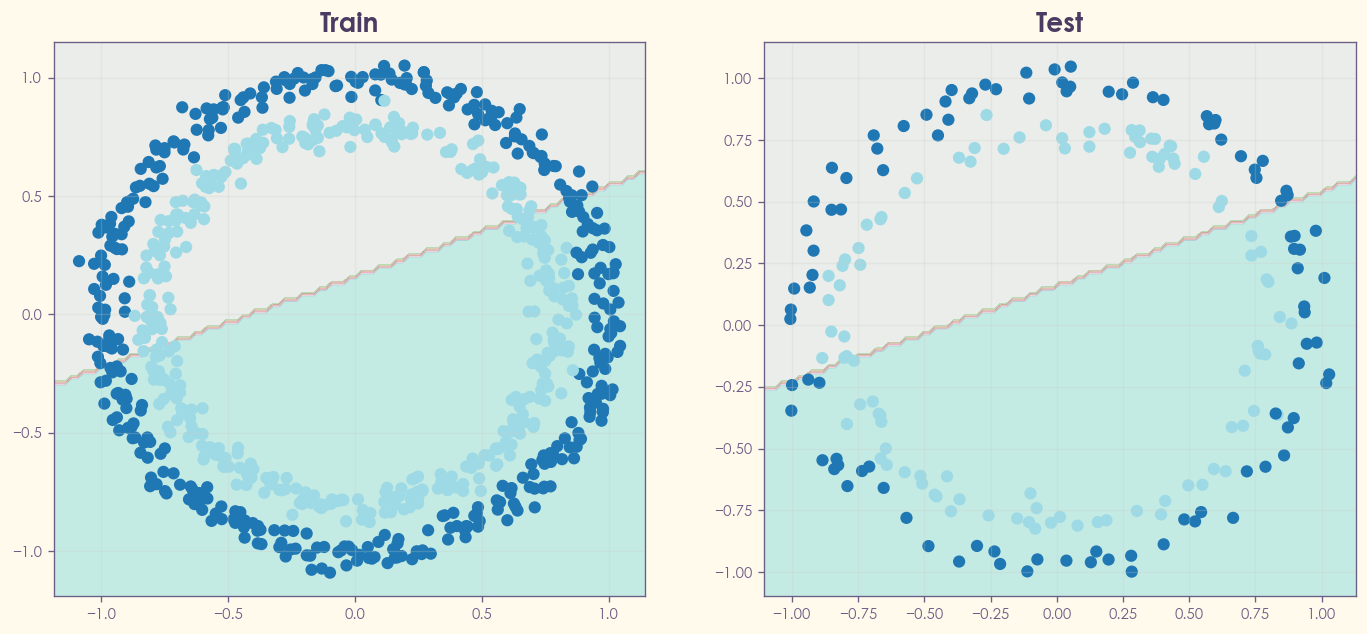

In [29]:
from helper_functions import plot_predictions, plot_decision_boundary

# Plot decision boundary of the model
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

#### Improving a Model (from a model prospective)
* Add more layers = give the model more chances to learn about patterns in the data
* Add more hidden units = go from 5 hidden units to 10 hidden units
* Fit for longer = increasing the epochs
* Changing the activation functions = maybe add some `ReLU()` within linear layers
* Changing the learning rate = smaller learning rate from `0.1` to `0.0001`
* Changing the loss function = `BCELoss` could be a choice but `BCEWithLogitsLoss` is already a better choice
* Changing the optimizer = Use `Adam()` maybe


*These options are all from a model's prospective because they deal directly with the model, rather than the data. In ML/DL prospective, we call it **Hyperparameters** and tweaking and changing it is called **Hyperparameter Tuning**.*

In [30]:
# Create a model
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        """ 1. Adding more hidden units"""
        self.layer_1 = nn.Linear(in_features=2, out_features=16)
        self.layer_2 = nn.Linear(in_features=16, out_features=16)
        self.layer_3 = nn.Linear(in_features=16, out_features=1)
    
    def forward(self, x):
#         z = self.layer_1(x)
#         z = self.layer_2(z)
#         z = slef.layer_3(z)
#         return z
#         or,
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_2 = CircleModelV1().to(device)
model_2

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
)

In [31]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [32]:
# Build a training loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer epochs
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

## Training loop
for epoch in range(epochs):
    model_2.train()
    
    """1. Forward Pass"""
    y_logits = model_2(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    """2. Calculate the loss and accuracy"""
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    """3. Optimizer zero grad"""
    optimizer.zero_grad()
    
    """4. Loss Backward (Backpropagation)"""
    loss.backward()
    
    """5. Optimizer step"""
    optimizer.step()
    
    
    ## Testing
    model_2.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_2(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Calculate loss
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
    # Print the epochs
    if epoch % 100 == 0:
        print(f"| Epoch: {epoch:03d} | Loss: {loss:.6f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}% |")

| Epoch: 000 | Loss: 0.696183 | Acc: 50.00% | Test Loss: 0.6934 | Test Acc: 50.00% |
| Epoch: 100 | Loss: 0.693003 | Acc: 51.38% | Test Loss: 0.6941 | Test Acc: 46.50% |
| Epoch: 200 | Loss: 0.692981 | Acc: 51.38% | Test Loss: 0.6946 | Test Acc: 45.00% |
| Epoch: 300 | Loss: 0.692981 | Acc: 51.38% | Test Loss: 0.6947 | Test Acc: 45.50% |
| Epoch: 400 | Loss: 0.692981 | Acc: 51.38% | Test Loss: 0.6947 | Test Acc: 45.50% |
| Epoch: 500 | Loss: 0.692981 | Acc: 51.38% | Test Loss: 0.6947 | Test Acc: 45.50% |
| Epoch: 600 | Loss: 0.692981 | Acc: 51.38% | Test Loss: 0.6947 | Test Acc: 45.50% |
| Epoch: 700 | Loss: 0.692981 | Acc: 51.38% | Test Loss: 0.6947 | Test Acc: 45.50% |
| Epoch: 800 | Loss: 0.692981 | Acc: 51.38% | Test Loss: 0.6947 | Test Acc: 45.50% |
| Epoch: 900 | Loss: 0.692981 | Acc: 51.38% | Test Loss: 0.6947 | Test Acc: 45.50% |


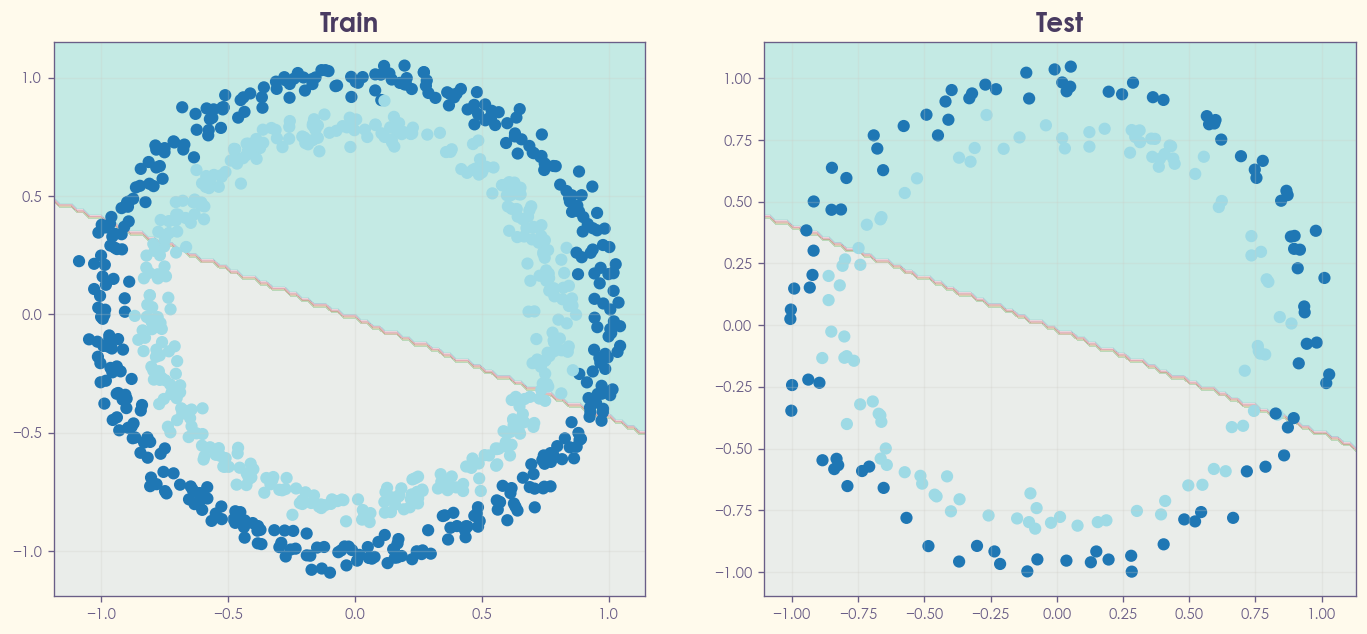

In [33]:
# Plot the decision boundary
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

Still the model is as bad as it was. It is still guessing. So does our model have any property to learn anything? Let's check with our previous linear dataset.

#### Preparing a data to see if our model can fit a straight line
This is one way to troubleshoot a larger problem by troubleshooting a smaller problem...

In [34]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_reg = torch.arange(start, end, step).unsqueeze(dim=1)
y_reg = weight * X_reg + bias # Linear regression formula

# Check the data
print(len(X_reg))
X_reg[:5], y_reg[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [35]:
# Create train and test split
train_split = int(0.8 * len(X_reg))
X_train_reg, y_train_reg = X_reg[:train_split], y_reg[:train_split]
X_test_reg, y_test_reg = X_reg[train_split:], y_reg[train_split:]

# Check the length
len(X_train_reg), len(X_test_reg), len(y_train_reg), len(y_test_reg)

(80, 20, 80, 20)

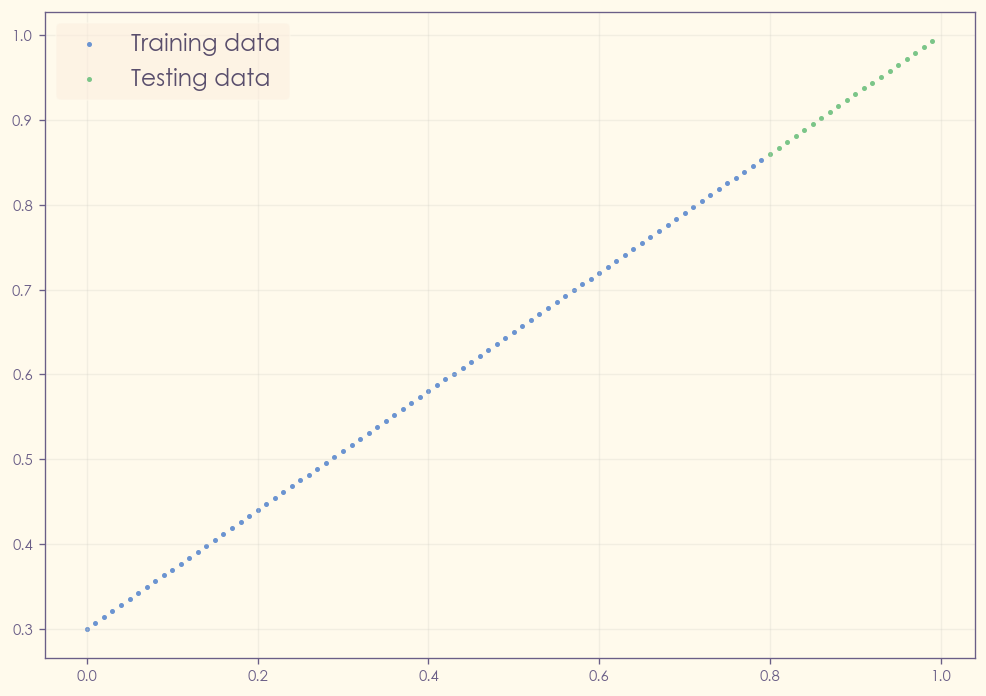

In [36]:
plot_predictions(train_data=X_train_reg,
                 train_labels=y_train_reg,
                 test_data=X_test_reg,
                 test_labels=y_test_reg)

In [37]:
print(model_0)
print(model_1)
print(model_2)

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)
CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
)


#### Adjusting `model_2` to fit a straight line

In [38]:
# Same architecture
model_3 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_3

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [39]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.01)

In [40]:
# Build a training loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer epochs
epochs = 1000

# Put data on the target device
X_train_reg, y_train_reg = X_train_reg.to(device), y_train_reg.to(device)
X_test_reg, y_test_reg = X_test_reg.to(device), y_test_reg.to(device)

## Training loop
for epoch in range(epochs):
    model_3.train()
    
    """1. Forward Pass"""
    y_pred = model_3(X_train_reg)
    
    """2. Calculate the loss and accuracy"""
    loss = loss_fn(y_pred, y_train_reg)
    
    """3. Optimizer zero grad"""
    optimizer.zero_grad()
    
    """4. Loss Backward (Backpropagation)"""
    loss.backward()
    
    """5. Optimizer step"""
    optimizer.step()
    
    
    ## Testing
    model_3.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_pred = model_3(X_test_reg)
        # 2. Calculate loss
        test_loss = loss_fn(test_pred, y_test_reg)
        
    # Print the epochs
    if epoch % 100 == 0:
        print(f"| Epoch: {epoch:03d} | Loss: {loss:.6f} | Test Loss: {test_loss:.4f} |")

| Epoch: 000 | Loss: 0.759859 | Test Loss: 0.9110 |
| Epoch: 100 | Loss: 0.028579 | Test Loss: 0.0008 |
| Epoch: 200 | Loss: 0.025325 | Test Loss: 0.0021 |
| Epoch: 300 | Loss: 0.021375 | Test Loss: 0.0031 |
| Epoch: 400 | Loss: 0.019645 | Test Loss: 0.0034 |
| Epoch: 500 | Loss: 0.019402 | Test Loss: 0.0039 |
| Epoch: 600 | Loss: 0.019033 | Test Loss: 0.0038 |
| Epoch: 700 | Loss: 0.018783 | Test Loss: 0.0038 |
| Epoch: 800 | Loss: 0.018397 | Test Loss: 0.0033 |
| Epoch: 900 | Loss: 0.017980 | Test Loss: 0.0036 |


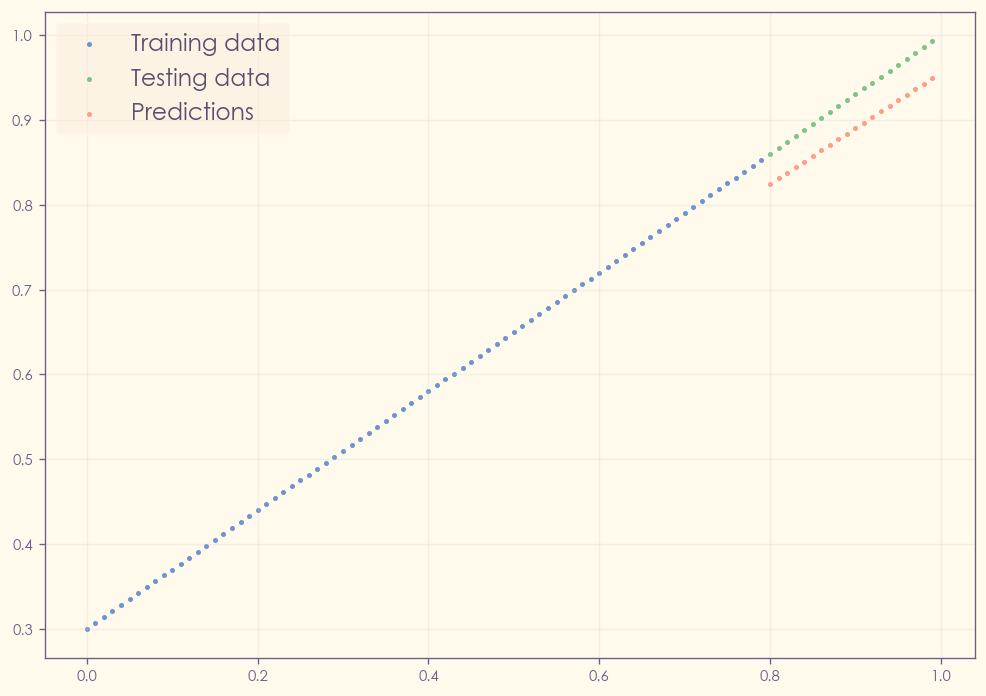

In [41]:
# Visualize
model_3.eval()
with torch.inference_mode():
    y_preds = model_3(X_test_reg)
    
# Plot data and predictions
plot_predictions(train_data=X_train_reg.cpu(),
                 train_labels=y_train_reg.cpu(),
                 test_data=X_test_reg.cpu(),
                 test_labels=y_test_reg.cpu(),
                 predictions=y_preds.cpu())

Our model is proven to be working with the linear regression model. So this model is not just wild guessing, it actually can learn. But it is efficient in learning linear data like this one. But the circular data we have seen before is not linear. That data was a non-linear data, which our model is not familiar with, or not have been introduced yet. So, let's start with non-linearity from now....

## Introducing Non-Linearity

In [42]:
# Make a thousand smaples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

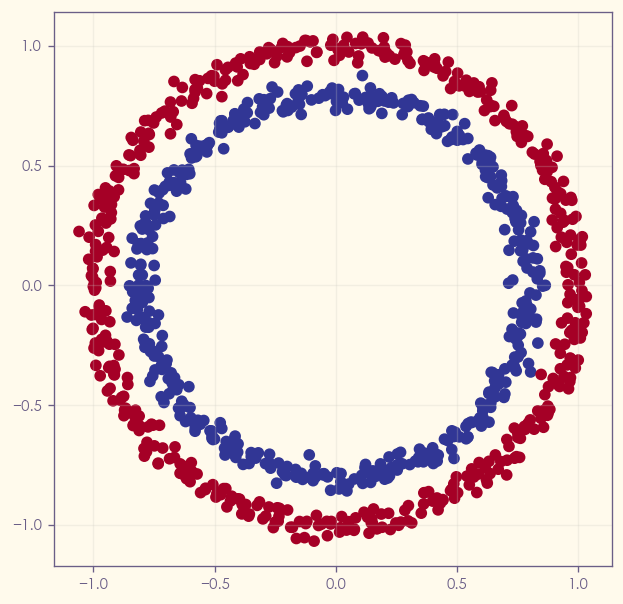

In [43]:
plt.figure(figsize=(6,6))
plt.scatter(x = X[:, 0],
            y = X[:, 1],
            c = y,
            cmap=plt.cm.RdYlBu)
plt.show()

In [44]:
# Convert  data to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [45]:
# Split into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

print(f"Length of Train splits\t: {len(X_train), len(y_train)}")
print(f"Length of Test splits\t: {len(X_test), len(y_test)}")

X_train[:5], y_train[:5]

Length of Train splits	: (800, 800)
Length of Test splits	: (200, 200)


(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

## Building a Model with Non-Linearity
Linear = Straight Line

Non-linear = Non-straight Line

In [46]:
# Build a model with non-linear function
from torch import nn

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # ReLU is a non-linear activation function
        
    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
model_4 = CircleModelV2().to(device)
model_4

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [47]:
# Set the loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1)

In [48]:
len(X_train), len(y_train)

(800, 800)

In [49]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put the data into device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Create the Training loop
epochs = 2000


for epoch in range(epochs):
    ## TRAINING LOOP
    model_4.train()
    
    """1. Forward pass"""
    y_logits = model_4(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    """2. Calculate Loss"""
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    """3. Optimizer zero grad"""
    optimizer.zero_grad()
    
    """4. Loss Backward (backpropagation)"""
    loss.backward()
    
    """5. Optimizer Step"""
    optimizer.step()
    
    ## Testing
    model_4.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_4(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # Calculate Loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)
        
    if epoch % 100 == 0:
        print(f"| Epoch: {epoch:03d} | Loss: {loss:.6f} | Acc: {acc:.6f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f} |")

| Epoch: 000 | Loss: 0.692946 | Acc: 50.000000 | Test Loss: 0.6932 | Test Acc: 50.0000 |
| Epoch: 100 | Loss: 0.691153 | Acc: 52.875000 | Test Loss: 0.6910 | Test Acc: 52.5000 |
| Epoch: 200 | Loss: 0.689774 | Acc: 53.375000 | Test Loss: 0.6894 | Test Acc: 55.0000 |
| Epoch: 300 | Loss: 0.687949 | Acc: 53.000000 | Test Loss: 0.6872 | Test Acc: 56.0000 |
| Epoch: 400 | Loss: 0.685168 | Acc: 52.750000 | Test Loss: 0.6841 | Test Acc: 56.5000 |
| Epoch: 500 | Loss: 0.681022 | Acc: 52.750000 | Test Loss: 0.6794 | Test Acc: 56.5000 |
| Epoch: 600 | Loss: 0.675149 | Acc: 54.500000 | Test Loss: 0.6729 | Test Acc: 56.0000 |
| Epoch: 700 | Loss: 0.666589 | Acc: 58.375000 | Test Loss: 0.6632 | Test Acc: 59.0000 |
| Epoch: 800 | Loss: 0.651596 | Acc: 64.000000 | Test Loss: 0.6476 | Test Acc: 67.5000 |
| Epoch: 900 | Loss: 0.623623 | Acc: 74.000000 | Test Loss: 0.6215 | Test Acc: 79.0000 |
| Epoch: 1000 | Loss: 0.568184 | Acc: 87.750000 | Test Loss: 0.5738 | Test Acc: 86.5000 |
| Epoch: 1100 | Loss

In [50]:
# Make preditions
model_4.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_4(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

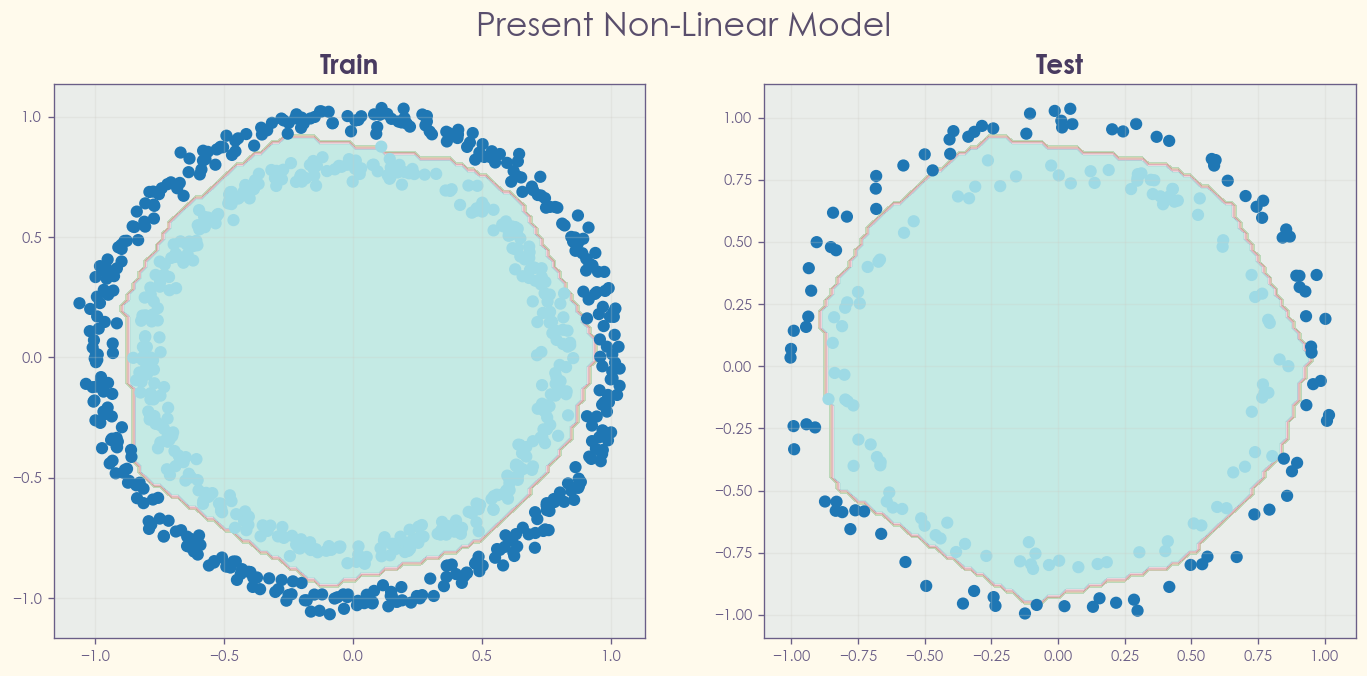

In [51]:
# Visualize 
# Plot the decision boundary
plt.figure(figsize=(14,6))

plt.suptitle("Present Non-Linear Model", size=20)
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_test, y_test)

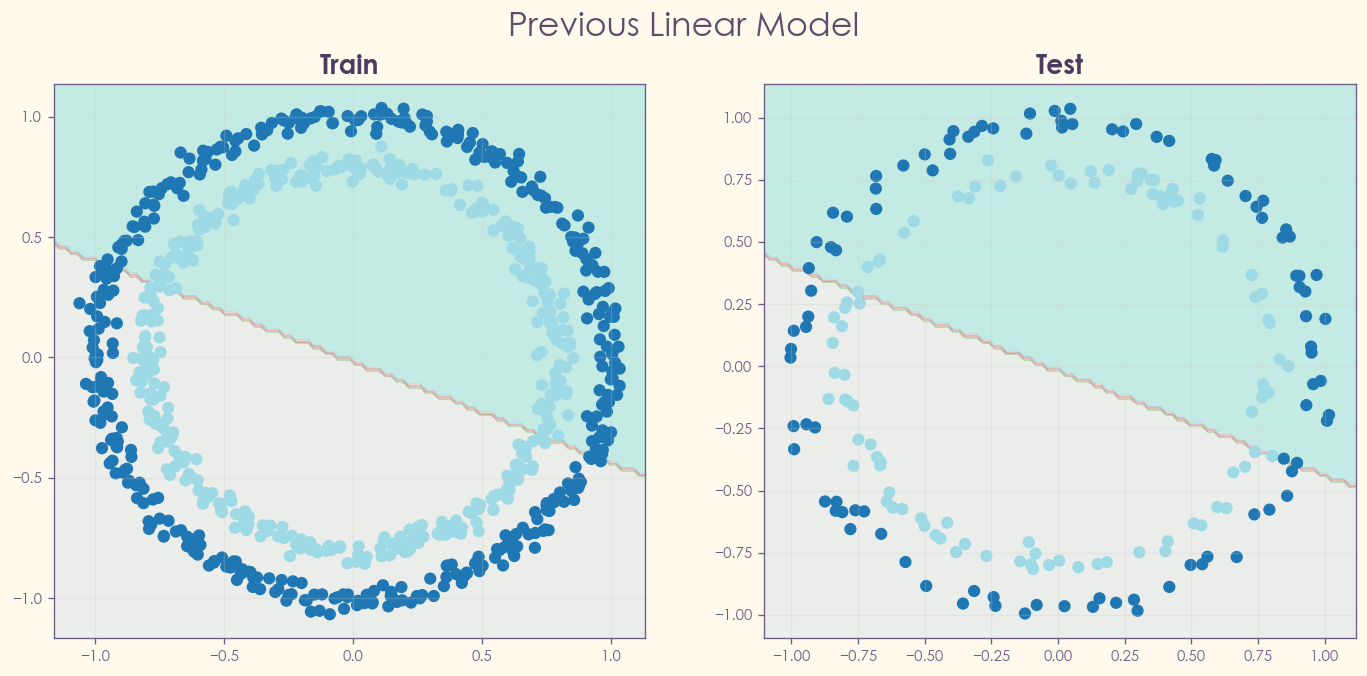

In [52]:
plt.figure(figsize=(14,6))
plt.suptitle("Previous Linear Model", size=20)
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)